In [9]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import convolve2d as conv2
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import Angle
import udft

from surfh.Simulation import simulation_data
from surfh.DottestModels import MCMO_SigRLSCT_Model
from surfh.ToolsDir import utils

from surfh.Simulation import fusion_CT
from surfh.Models import instru
from surfh.ToolsDir import fusion_mixing

from surfh.Models import wavelength_mrs, realmiri

import pathlib
from jwst import datamodels

from skimage.measure import label

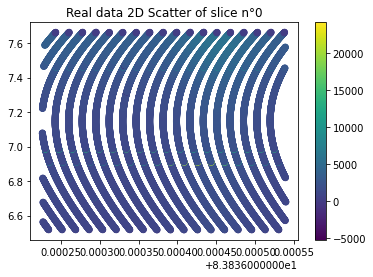

Min alpha is 83.83622662239941, Max alpha is 83.8365391196923
Range alpha is 0.0003124972928958414


In [10]:
model=datamodels.open('/home/nmonnier/Data/JWST/Orion_bar/Stage_2/jw01288002001_0211f_00001_mirifushort_cal.fits')
data = model.data

x_shape = data.shape[0]
y_shape = data.shape[1]

x_pixel_idx = np.arange(x_shape)
y_pixel_idx = np.arange(y_shape)

yy, xx = np.meshgrid(x_pixel_idx, y_pixel_idx)

detector2world = model.meta.wcs.get_transform('detector', 'alpha_beta')

coordinates = detector2world(xx, yy)
test = detector2world(120,120)
binary_grid = np.zeros_like(data)


binary_grid[~np.isnan(coordinates[0].T)] = 1
# Label connected components: Identify and label the white regions
label_image = label(binary_grid)

pixel_set = np.where(label_image==10)

list_alpha = []
list_beta = []
list_lam = []
alpha, beta, lam = detector2world(pixel_set[1],pixel_set[0])

intensity = data[pixel_set]
#plt.figure(figsize=(2, 8))
sc = plt.scatter(alpha, lam, c=intensity)
plt.colorbar(sc)
plt.title(f"Real data 2D Scatter of slice n°{0}")


plt.show()
world2detector = model.meta.wcs.get_transform('world', 'detector')
world2detector(alpha[0], beta[0], lam[0])
print(f'Min alpha is {np.min(alpha)}, Max alpha is {np.max(alpha)}')
print(f'Range alpha is {np.max(alpha) - np.min(alpha)}')
